In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Reading leaderboard data from 2024-04-14 version, filtering only ast simple evaluation category.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/ShishirPatil/gorilla/bdd9d0ac13b6d61ebe1cbfed3903cd16939f1d5f/data.csv")
df = df[['Model', 'Simple Function AST']].sort_values(by='Simple Function AST', ascending=False)
df

,Model,Simple Function AST
0,GPT-4-0125-Preview (Prompt),88.00%
4,Gorilla-OpenFunctions-v2 (FC),87.64%
1,Claude-3-Opus-20240229 (Prompt),86.36%
2,GPT-4-turbo-2024-04-09 (Prompt),85.82%
13,Claude-3-Haiku-20240307 (Prompt),85.45%
23,Claude-3-Haiku-20240307 (FC tools-2024-04-04),85.27%
17,Mistral-large-2402 (FC Any),82.91%
3,GPT-4-1106-Preview (FC),82.00%
8,Claude-3-Sonnet-20240229 (Prompt),81.82%
19,Mistral-small-2402 (FC Any),81.09%


Loading our benchmark results.

In [9]:
df_outlines = pd.read_csv('../data.csv')
df_outlines = df_outlines[['Model', 'Simple Function AST']].sort_values(by='Simple Function AST', ascending=False)
df_outlines = df_outlines[df_outlines['Model'].str.contains("Outlines")]
df_outlines

,Model,Simple Function AST
2,Deepseek-v1.5 (Outlines),87.00%
3,Gorilla-OpenFunctions-v2 (Outlines),87.00%
6,Mistral-7B-Instruct-v0.2 (Outlines),85.50%
9,Gemma-7b-it (Outlines),84.25%
10,Meta-Llama-3-8B-Instruct (Outlines),84.25%


In [10]:
def insert_row(model: str, score: str) -> pd.DataFrame:
    return (pd.concat([df, pd.DataFrame({'Model': [model], 'Simple Function AST': [score]})])
                    .sort_values('Simple Function AST', ascending=False)
                    .reset_index(drop=True)
                    .copy())

In [11]:
def plot_bar_ranking(df, keyword="Outlines"):
    df['Simple Function AST'] = df['Simple Function AST'].str.replace('%', '').astype(float)
    # Extract the model containing the keyword and find its prefix
    model_with_keyword = df[df["Model"].str.contains(keyword)]["Model"].iloc[0]
    prefix = model_with_keyword.split('-')[0]
    
    # Sorting the dataframe by performance in descending order
    df_sorted = df.sort_values(by="Simple Function AST", ascending=True)

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(12, 8))
    bars = ax.barh(df_sorted["Model"], df_sorted["Simple Function AST"], color='grey')
    ax.set_xlabel("Accuracy [%]")
    ax.set_title("Model Performance on AST Simple Function")

    # Highlight models starting with the same prefix as the model with the keyword
    highlight_color = "#DA4167"
    highlight_color_light = "#EB99AD"
    for bar, model in zip(bars, df_sorted["Model"]):
        if model.startswith(prefix):
            bar.set_color(highlight_color_light)
        if keyword in model:
            bar.set_color(highlight_color)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    plt.show()

    #save fig
    fig.savefig(f'../figures/{prefix}_bar_plot.png', bbox_inches='tight', dpi=300)

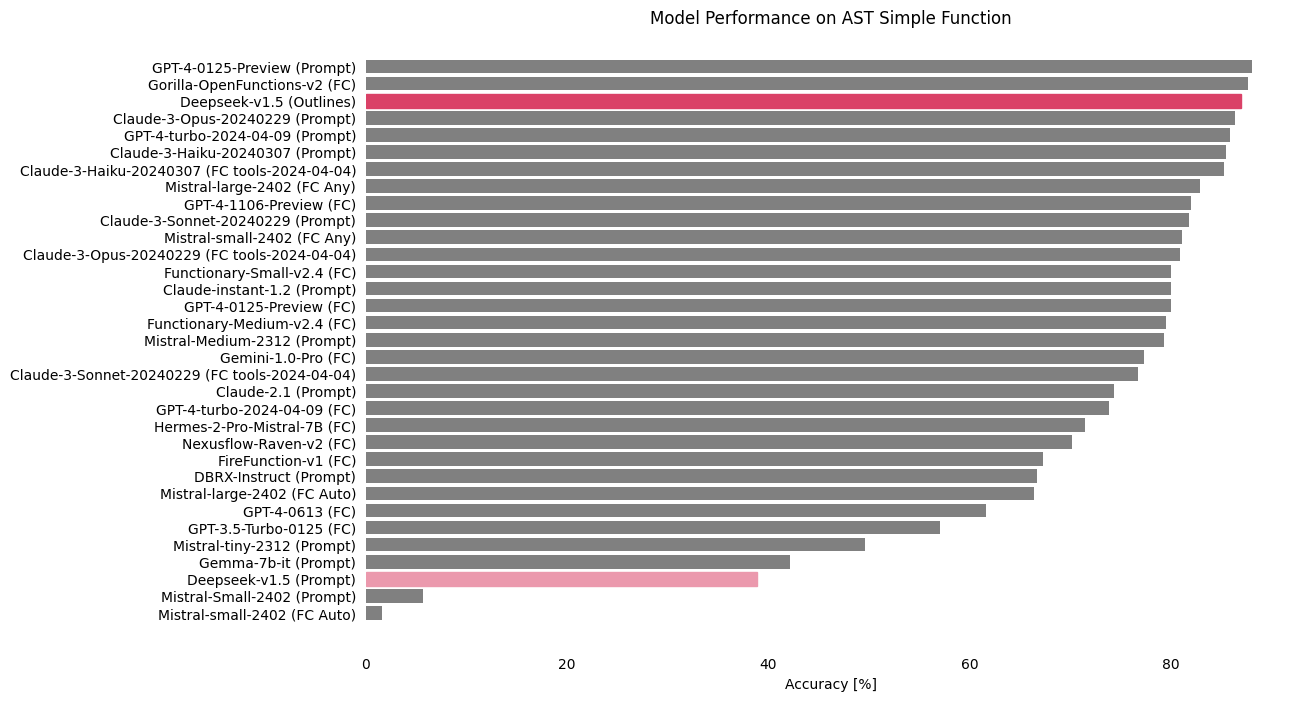

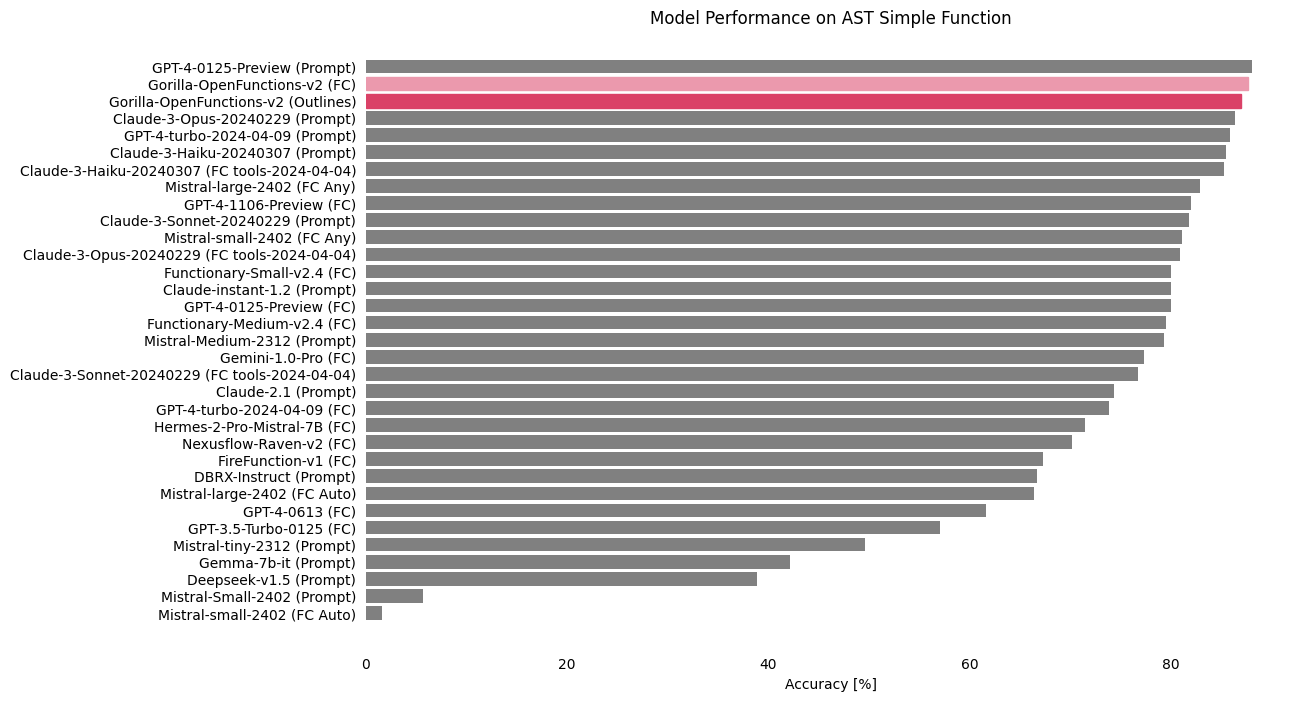

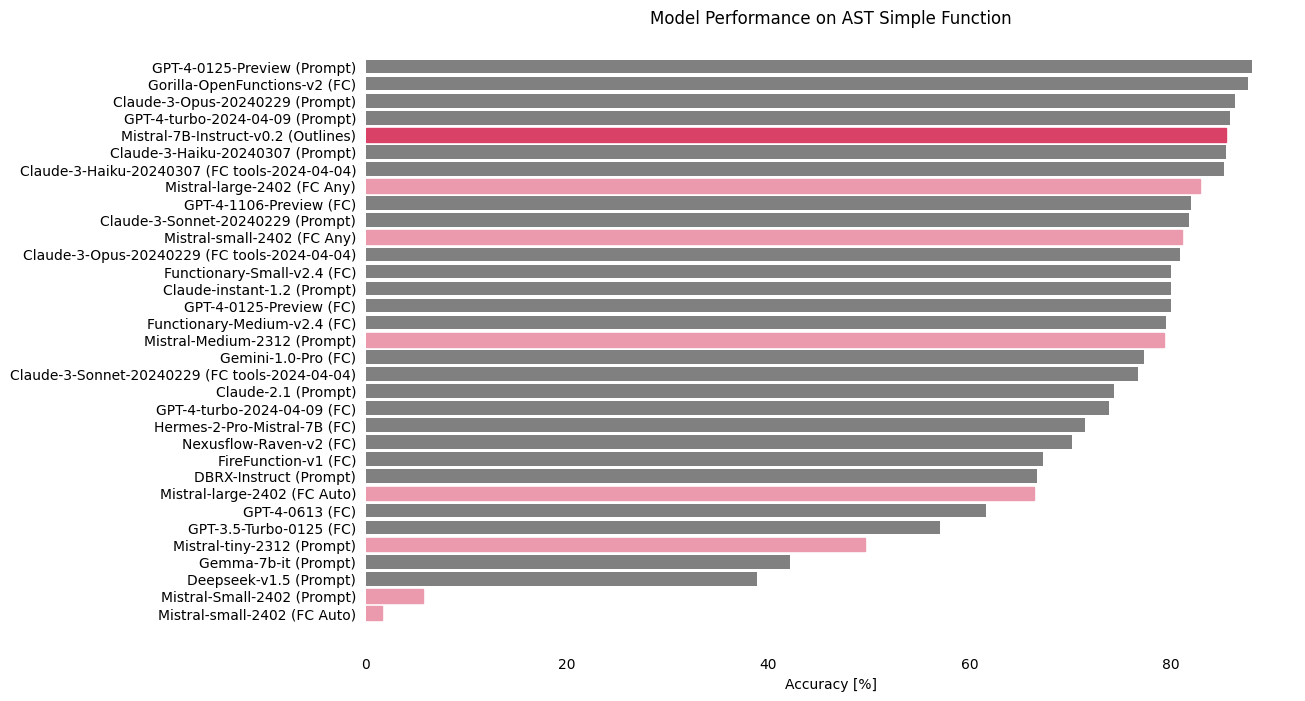

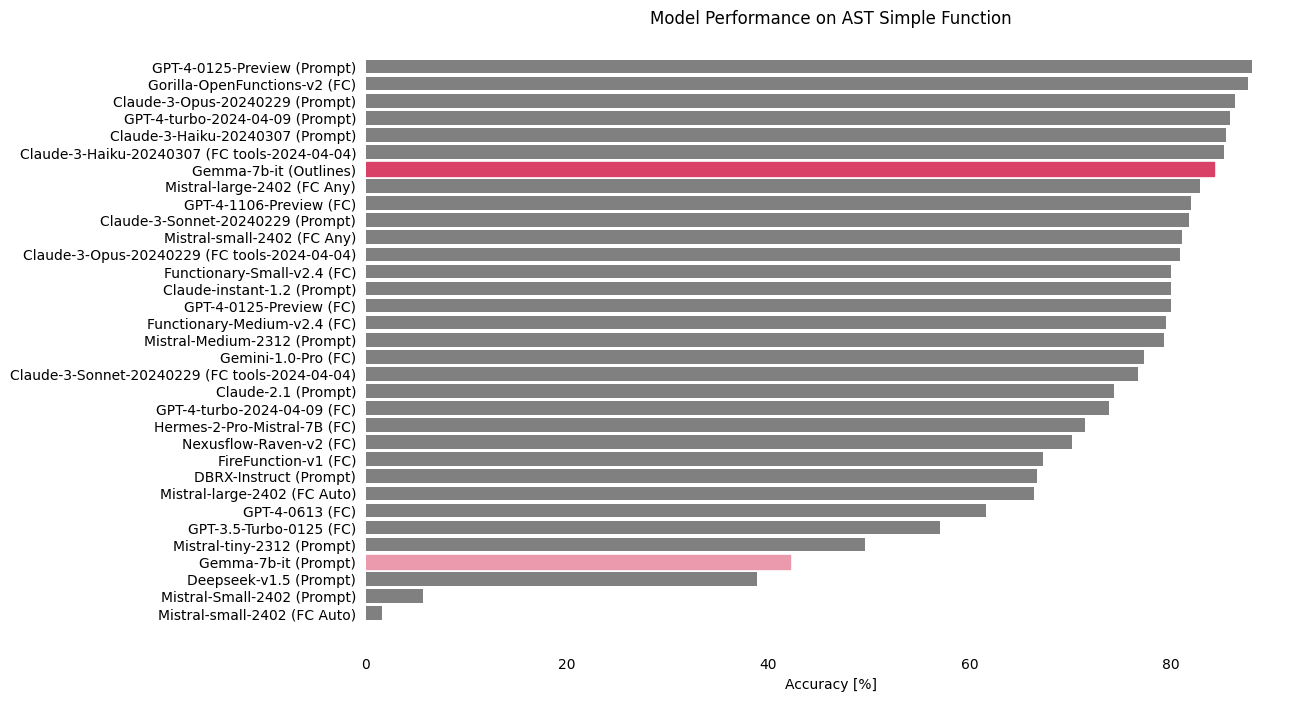

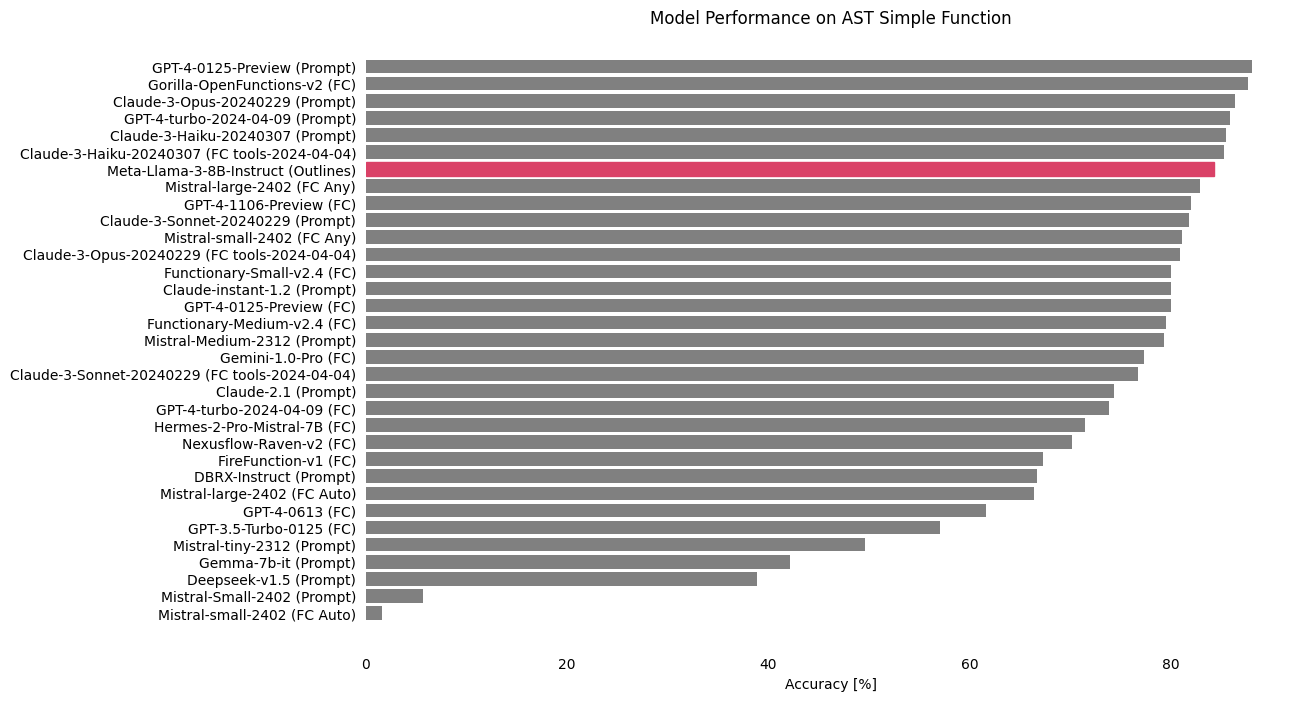

In [12]:
for model in df_outlines['Model']:
    df_table = insert_row(model, df_outlines[df_outlines['Model'] == model]['Simple Function AST'].values[0])
    plot_bar_ranking(df_table)